In [ ]:
import pandas as pd
import numpy as np
import re 
import nltk 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# df = pd.read_csv('/content/preprocessed2.csv')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rionaldoalviansa/Deep-Learning/main/preprocessed2.csv')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['tagging'])

In [ ]:
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
df['stem_str'].head()

0    jakarta jejaring sosial edar informasi sebut l...
1    isu ikan lele kandung sel kanker jejaring soci...
2    nikmat kuliner bahan dasar ikan lele berita su...
3    ikan lele salah makan favorit indonesia harga ...
4    ikan lele bahan makan populer indonesia sebar ...
Name: stem_str, dtype: object

In [ ]:
corpus = []
for i in df['stem_str']:
  corpus.append(i)

In [ ]:
corpus[0]

'jakarta jejaring sosial edar informasi sebut lele ikan jorok suap daging ikan lele kandung 3000 sel kanker juluk ikan jorok rujuk sifat lele doyan konsumsi jenis limbah air artikel viral internet kotor manusia jadi pakan budidaya lele kota haikou china habitat asli lele catfish kenal spesies ikan tangguh ikan lengkap alat napas tambah labirin tahan hidup kondisi air lumpur cemar fakta muncul duga akumulasi racun karsinogen sebab kanker tubuh ikan lele untung ikan lele edar pasar asal alam liar lele dibudidayakan kolam mesti kendali bebas cemar pakan pilih andal limbah popularitas ikan sungut pudar tingkat data menteri laut ikan kkp sebut produksi lele 2013 capai 543 461 ton tingkat 441 217 ton 2012 337 577 ton 2011 konsumsi ikan lele badan pusat statistik bps catat 29 98 kg kapita 22 58 kg kapita 2004 jakarta 6000 lapak pecel lele daftar asosiasi dagang kaki indonesia apkli kandung nutrisi dipungkiri lele sumber protein harga murah riah fakta ikan lele rendah kolesterol tenggelam tudi

In [ ]:
max = 0
for i in df['stemmed']:
  if len(i) > max:
    max = len(i)

In [ ]:
voc_size = 5000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [ ]:
sent_length = 200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3279  571 4088]
 [2370 1110 3424 ... 3864 4407 3367]
 [   0    0    0 ...  475 2854 2426]
 ...
 [   0    0    0 ... 4162  811 3521]
 [   0    0    0 ...   16 4300 1449]
 [   0    0    0 ... 4162  811 3521]]


In [ ]:
len(embedded_docs),df['label'].shape

(600, (600,))

In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 1936, 3894, 1619, 3656,  529, 1641,  548, 1358, 2424,
       2914, 2902, 1358,  548,  268, 2045,  591,  475,  243, 1358, 2424,
       1736,  101,  548,  541, 1712, 1084, 1476, 2852,  298, 2393, 1110,
       3424, 2426,  480, 3414,  368,  548, 4804, 2040, 3107, 3531, 4768,
        548, 1498, 4727, 4839, 1358, 1297, 1358,  586, 2598, 2262,  264,
       3223, 3085, 3936, 2432, 2852, 4244,  281, 2033, 3878, 1105, 1602,
       2547, 4221, 3727,  475, 2854, 1358,  548, 2180, 1358,  548, 3656,
       1643, 2544, 2520,  330,  548, 3451,  759, 2472, 1119,  250,  281,
       3414, 1024, 2987, 1476, 2963, 1358,  739, 2074, 1703,  989, 1959,
       3501, 1358, 2728, 1641, 1600,  548, 1824, 3811, 1210,  548, 1028,
       1703, 1472, 1929, 1028, 2789, 2437, 3139, 1028,  942, 1712, 1358,
        548,  657, 4270, 3564, 1783,  438,  534, 2298, 4825, 2897, 4355,
       2895, 4825, 2897, 2966, 1936,   84, 3136,  7

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(df['label'])

In [ ]:
X_final.shape,y_final.shape

((600, 200), (600,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=28,stratify = y_final)

In [ ]:
y_train.shape

(480,)

#Testing of Base Bi-LSTM Model

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/rionaldoalviansa/Deep-Learning/main/preprocessedtest.csv')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
test_df['label']= label_encoder.fit_transform(test_df['tagging'])

In [ ]:
test_corpus = []
for i in test_df['stem_str']:
  test_corpus.append(i)

In [ ]:
max = 0
for i in test_df['stemmed']:
  if len(i) > max:
    max = len(i)

In [ ]:
voc_size = 5000
onehot_repr=[one_hot(words,voc_size)for words in test_corpus] 

In [ ]:
sent_length = 200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [ ]:
import numpy as np
X_test=np.array(embedded_docs)
y_test=np.array(test_df['label'])

In [ ]:
keras.backend.clear_session()
embedding_vector_features=256
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
print(model.summary())
history = model.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=10, batch_size = 16)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              285600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2)                 402       
                                                                 
Total params: 1,566,002
Trainable params: 1,566,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
30/30 [==============================] - 7s 54ms/step - loss: 0.6531 - accuracy: 0.6271 - val_loss: 0.5943 - val_accuracy: 0.7000
Epoch 2/10
30/30 [==============================] - 1s 23ms/step - loss: 0.4679 - accuracy: 0.8438

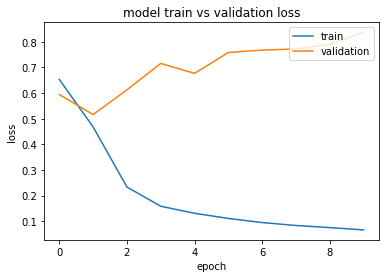

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

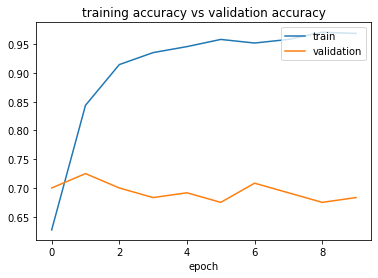

In [ ]:
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.title('training accuracy vs validation accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'validation'], loc='upper right')
 plt.show() 

In [ ]:
y_pred = model.predict(X_test).argmax(-1)
accuracy_score(y_test,y_pred)

8/8 [==============================] - 1s 8ms/step


0.908

In [ ]:
import seaborn as sns

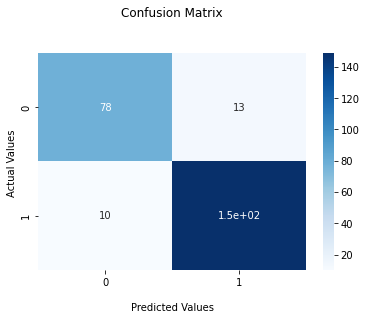

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        91
           1       0.92      0.94      0.93       159

    accuracy                           0.91       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.91      0.91      0.91       250

